In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

In [23]:
df = pd.read_csv('Survey_Car.csv',sep=';')

In [24]:
columns=['Main_transportation','Licence', 'Car_owner', 'Energy', 'Gender',
       'Location','Purchase_car']

In [25]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_encoded=df
#creating labelEncoder
for i in columns:
    df_encoded[i] = le.fit_transform(df[i])

In [26]:
df_encoded

,Main_transportation,Distance,Licence,Car_owner,Energy,Frequency_usage,Seniority_car,Budget_car,Quiet,Speed,Robustness,Autonomy,Design,Technology,Ecology,Gender,Location,Age,Income,Purchase_car
0,2,50,1,0,3,0.0,0,15000,4,4,5,4,5,5,5,0,0,25,8500,0
1,2,50,0,0,3,0.0,0,15000,3,3,5,5,5,5,5,0,0,25,23500,1
2,0,5,1,1,4,3.0,4,25000,4,3,5,5,4,3,4,0,1,25,8500,1
3,0,5,1,0,3,0.0,0,15000,4,3,5,3,4,4,4,0,0,25,8500,1
4,1,5,1,1,4,4.0,4,15000,4,3,4,4,3,4,4,1,0,25,8500,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,1,20,0,1,4,3.0,6,25000,5,5,3,5,3,5,5,0,0,25,37500,1
101,1,50,1,1,4,7.0,9,25000,4,5,5,5,3,3,2,1,1,55,52500,0
102,1,50,1,1,2,7.0,4,25000,5,3,4,4,5,4,4,0,1,55,52500,0
103,0,5,1,1,2,3.0,1,45000,5,5,5,3,5,5,4,1,0,35,52500,1


In [27]:
X = df_encoded[['Main_transportation', 'Distance', 'Energy',
       'Frequency_usage', 'Seniority_car', 'Budget_car', 'Quiet', 'Speed',
       'Robustness', 'Autonomy', 'Design', 'Technology', 'Ecology', 'Gender',
       'Location', 'Age', 'Income']]
y = df_encoded.iloc[:,19]

train, test, target_train,  target_test  =   train_test_split(X, y, test_size=.35, random_state=8)

In [28]:
target_train.value_counts()

1    47
0    21
Name: Purchase_car, dtype: int64

In [29]:
target_test.value_counts()

1    32
0     5
Name: Purchase_car, dtype: int64

In [30]:
clf = svm.SVC(kernel='linear')
model = clf.fit(train, target_train)

In [31]:
## Predictions
predictions=clf.predict(test)

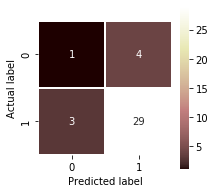

Accuracy: 81.1%


In [33]:

plt.figure(figsize=(3,3))
sns.heatmap(metrics.confusion_matrix(target_test,predictions), annot=True, linewidths=.5, square = True, cmap = 'pink');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.show();

print("Accuracy: {0:.1f}%".format(metrics.accuracy_score(target_test, predictions) * 100))

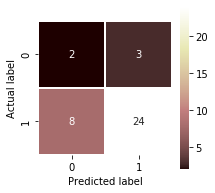

Accuracy: 70.3%


In [34]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=14)
clf.fit(train, target_train)
predictions=clf.predict(test)
plt.figure(figsize=(3,3))
sns.heatmap(metrics.confusion_matrix(target_test, predictions), annot=True, linewidths=.5, square = True, cmap = 'pink');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.show();
print("Accuracy: {0:.1f}%".format(metrics.accuracy_score(target_test, predictions) * 100))

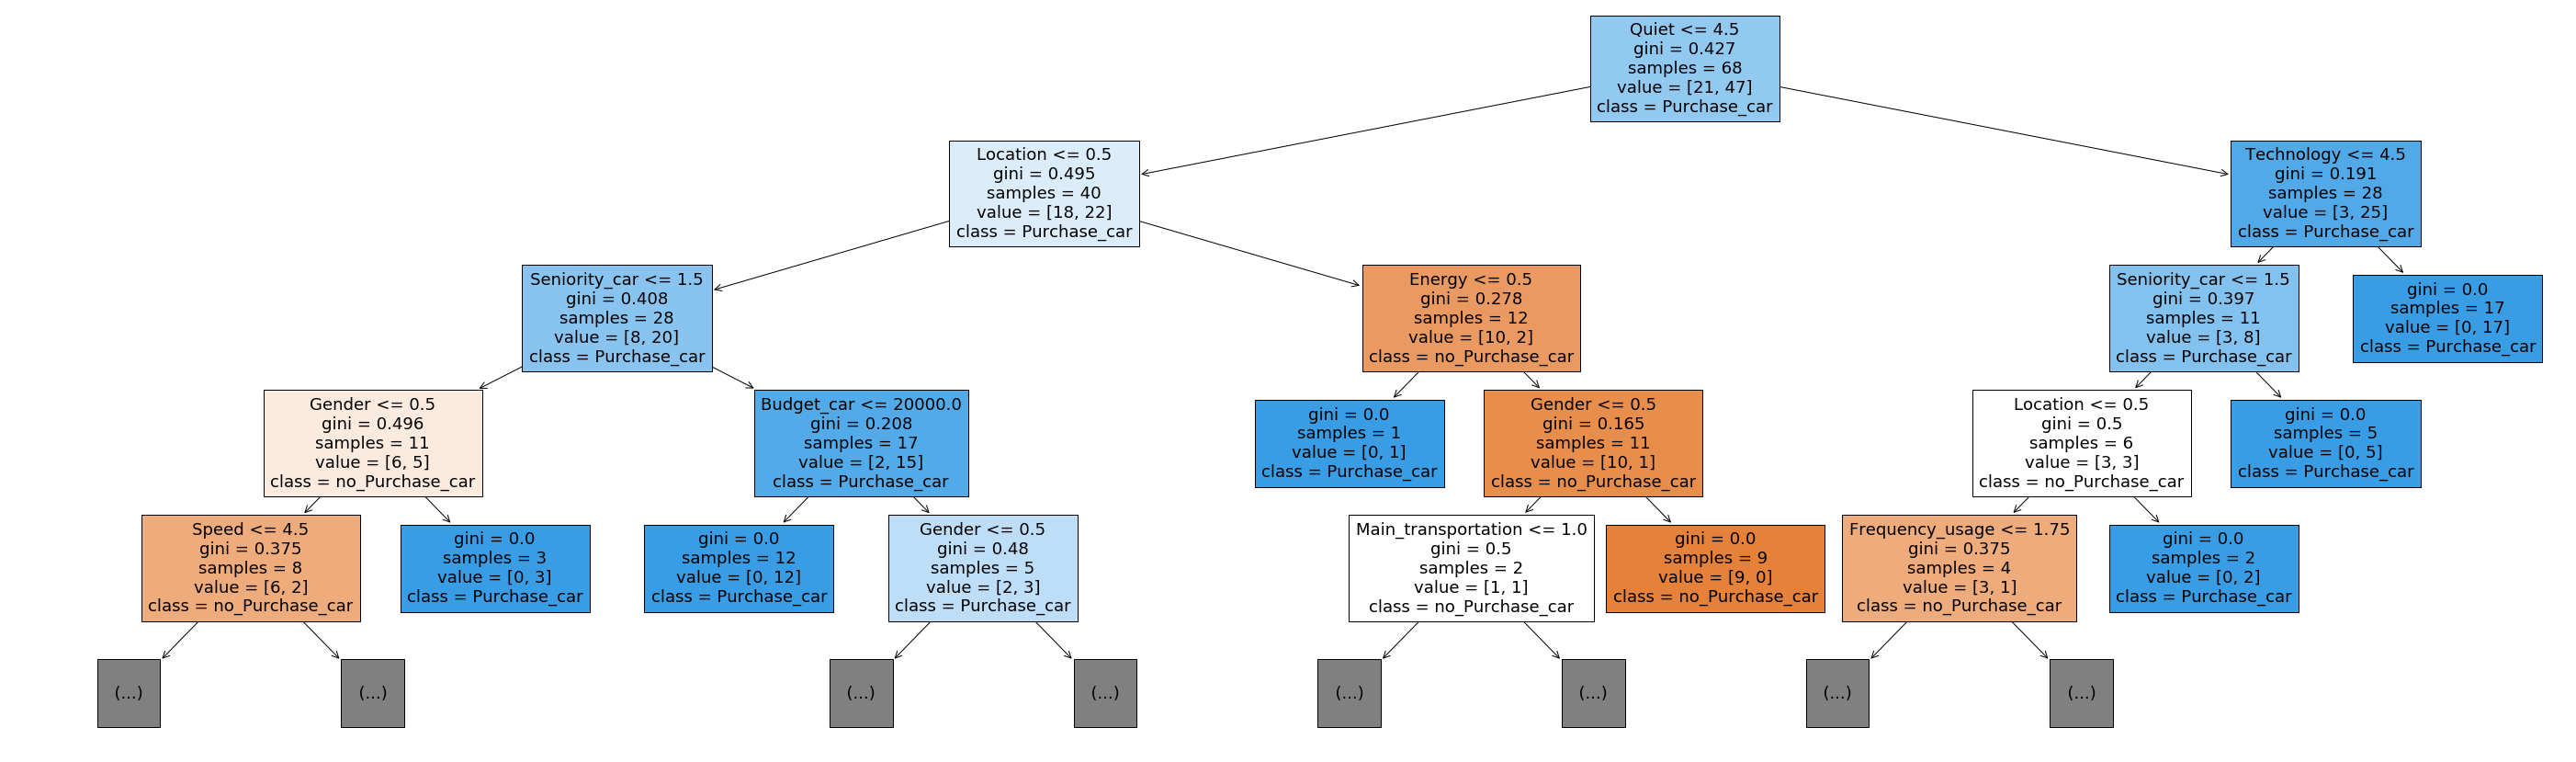

In [35]:
feat_names= ['Main_transportation', 'Distance', 'Energy',
       'Frequency_usage', 'Seniority_car', 'Budget_car', 'Quiet', 'Speed',
       'Robustness', 'Autonomy', 'Design', 'Technology', 'Ecology', 'Gender',
       'Location', 'Age', 'Income']
cl_names=['no_Purchase_car','Purchase_car']

#Displaying the decision tree
from sklearn import tree
plt.figure(figsize=(50,15))
tree.plot_tree(clf, max_depth=4, feature_names=feat_names, class_names=cl_names, filled=True)

plt.show()


In [36]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(max_iter=10000)
logisticRegr.fit(train, target_train)
predictions = logisticRegr.predict(test)

# Use score method to get accuracy of model
score = logisticRegr.score(test, target_test)
print(f'Accuracy of the model: {score*100} %')

Accuracy of the model: 72.97297297297297 %


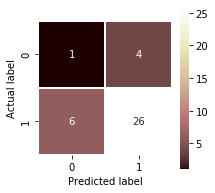

Accuracy: 73.0%


In [37]:
plt.figure(figsize=(3,3))
sns.heatmap(metrics.confusion_matrix(target_test,predictions), annot=True, linewidths=.5, square = True, cmap = 'pink');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.show();
print("Accuracy: {0:.1f}%".format(metrics.accuracy_score(target_test, predictions) * 100))

In [38]:
kNN = KNeighborsClassifier(n_neighbors=6)

In [39]:
kNN.fit(train,target_train)

#Predict Output
predictions= kNN.predict(test)

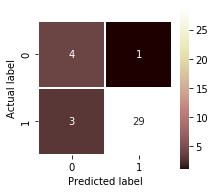

Accuracy: 89.2%


In [40]:
plt.figure(figsize=(3,3))
sns.heatmap(metrics.confusion_matrix(target_test,predictions), annot=True, linewidths=.5, square = True, cmap = 'pink');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.show();
print("Accuracy: {0:.1f}%".format(metrics.accuracy_score(target_test, predictions) * 100))

Maximum accuracy:- 89.1891891891892 at K = 6


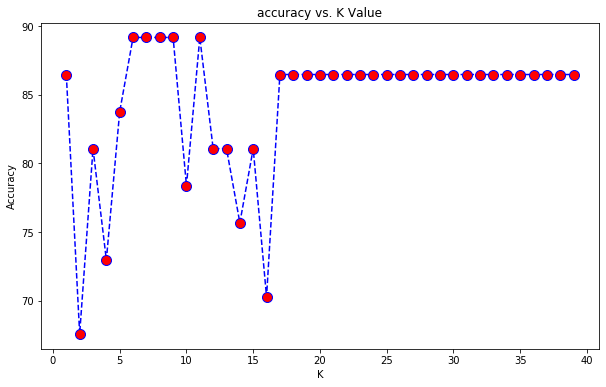

In [41]:
k=0
error_rate = []
p=[]
for k in range (1,40):
        kNN = KNeighborsClassifier(n_neighbors=k)
        kNN.fit(train,target_train)
        #Predict Output
        predictions= kNN.predict(test)
        p.append(metrics.accuracy_score(target_test, predictions) * 100)
        error_rate.append(np.mean(predictions != target_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,40),p,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(p),"at K =",p.index(max(p))+1)

Minimum error:- 0.10810810810810811 at K = 6


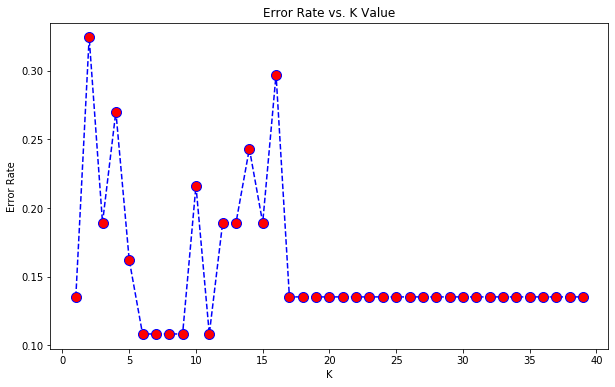

In [42]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)